In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/final_cleaned_dataset/cleaned_annex.csv')
df.sample(5)

,Item Name,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
465309,Net Lotus Root (1),Aquatic Tuberous Vegetables,0.474,6.0,sale,Yes
623020,Net Lotus Root (1),Aquatic Tuberous Vegetables,1.508,8.0,sale,No
815082,Zhijiang Qinggengsanhua,Cabbage,0.455,10.8,sale,No
350605,Green Hangzhou Pepper (2),Capsicum,0.100,8.0,sale,No
45652,Paopaojiao (Jingpin),Capsicum,0.220,10.0,sale,No


In [3]:
df['Sale or Return'].value_counts()

Sale or Return
sale      878042
return       461
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    878503 non-null  object 
 1   Category Name                878503 non-null  object 
 2   Quantity Sold (kilo)         878503 non-null  float64
 3   Unit Selling Price (RMB/kg)  878503 non-null  float64
 4   Sale or Return               878503 non-null  object 
 5   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), object(4)
memory usage: 40.2+ MB


In [5]:
df['Discount (Yes/No)'].value_counts()

Discount (Yes/No)
No     831137
Yes     47366
Name: count, dtype: int64

In [6]:
scaler = StandardScaler()
df.iloc[:,[2, 3]] = scaler.fit_transform(df.iloc[:,[2, 3]])

In [7]:
df['Unit Selling Price (RMB/kg)'].min(), df['Unit Selling Price (RMB/kg)'].max()

(-1.397049336052622, 17.584892414875554)

In [8]:
df.iloc[:,[2, 3]].corr()

,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
Quantity Sold (kilo),1.000000,-0.374163
Unit Selling Price (RMB/kg),-0.374163,1.000000


In [9]:
df = pd.get_dummies(df)
df.shape

(878503, 254)

In [10]:
df.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper (1),Item Name_7 Colour Pepper (2),Item Name_7 Colour Pepper (Bag),Item Name_Agaricus Bisporus (Bag),Item Name_Agaricus Bisporus (Box),Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth (Bag),...,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower,Category Name_Solanum,Sale or Return_return,Sale or Return_sale,Discount (Yes/No)_No,Discount (Yes/No)_Yes
54489,0.132191,-0.145319,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
283327,-0.045270,-0.462212,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
519972,-0.700127,1.439151,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
649816,1.159467,-0.763262,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
91813,-1.102539,1.439151,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False


In [11]:
# k_values = range(2,21)
# 
# wcss_values = []
# 
# for k in k_values:
#     print(f'Training : {k}')
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(df)
#     wcss_values.append(kmeans.inertia_)
#     print(f'Clusters --> \u001B[34m{k}\u001B[39m    WCSS --> \u001B[31m{wcss_values[-1]}\u001B[39m')

In [12]:
# # Plot the results
# plt.plot(k_values, wcss_values, marker='o')
# plt.title('Randomly Sampled WCSS for Different K Values')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('WCSS')
# plt.show()

In [13]:
model = KMeans(n_clusters=13)
pred = model.fit_predict(df)

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
pred

array([ 6,  9,  6, ...,  4, 12,  3], dtype=int32)

In [15]:
df['Amount'] = df['Quantity Sold (kilo)'] * df['Unit Selling Price (RMB/kg)']

In [16]:
df['cluster'] = pred
df.head(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper (1),Item Name_7 Colour Pepper (2),Item Name_7 Colour Pepper (Bag),Item Name_Agaricus Bisporus (Bag),Item Name_Agaricus Bisporus (Box),Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth (Bag),...,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower,Category Name_Solanum,Sale or Return_return,Sale or Return_sale,Discount (Yes/No)_No,Discount (Yes/No)_Yes,Amount,cluster
0,-0.350203,-0.208697,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,0.073087,6
1,0.782050,-0.905864,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,-0.708431,9
2,-0.317710,-0.208697,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,0.066305,6
3,-0.287717,0.171575,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,-0.049365,1
4,0.007219,-0.145319,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,-0.001049,1


In [17]:
c1 = df[df['cluster'] == 0]
c2 = df[df['cluster'] == 1]
c3 = df[df['cluster'] == 2]
c4 = df[df['cluster'] == 3]
c5 = df[df['cluster'] == 4]
c6 = df[df['cluster'] == 5]
c7 = df[df['cluster'] == 6]
c8 = df[df['cluster'] == 7]
c9 = df[df['cluster'] == 8]
c10 = df[df['cluster'] == 9]
c11 = df[df['cluster'] == 10]
c12 = df[df['cluster'] == 11]
c13 = df[df['cluster'] == 12]

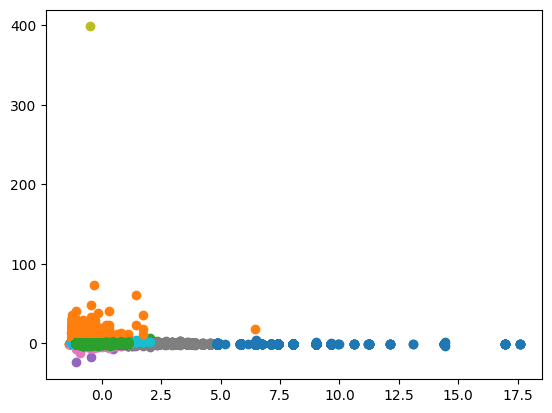

In [18]:
plt.scatter(c1['Unit Selling Price (RMB/kg)'], c1['Quantity Sold (kilo)'])
plt.scatter(c2['Unit Selling Price (RMB/kg)'], c2['Quantity Sold (kilo)'])
plt.scatter(c3['Unit Selling Price (RMB/kg)'], c3['Quantity Sold (kilo)'])
plt.scatter(c4['Unit Selling Price (RMB/kg)'], c4['Quantity Sold (kilo)'])
plt.scatter(c5['Unit Selling Price (RMB/kg)'], c5['Quantity Sold (kilo)'])
plt.scatter(c6['Unit Selling Price (RMB/kg)'], c6['Quantity Sold (kilo)'])
plt.scatter(c7['Unit Selling Price (RMB/kg)'], c7['Quantity Sold (kilo)'])
plt.scatter(c8['Unit Selling Price (RMB/kg)'], c8['Quantity Sold (kilo)'])
plt.scatter(c9['Unit Selling Price (RMB/kg)'], c9['Quantity Sold (kilo)'])
plt.scatter(c10['Unit Selling Price (RMB/kg)'], c10['Quantity Sold (kilo)'])
plt.scatter(c11['Unit Selling Price (RMB/kg)'], c11['Quantity Sold (kilo)'])
plt.scatter(c12['Unit Selling Price (RMB/kg)'], c12['Quantity Sold (kilo)'])
plt.scatter(c13['Unit Selling Price (RMB/kg)'], c13['Quantity Sold (kilo)'])

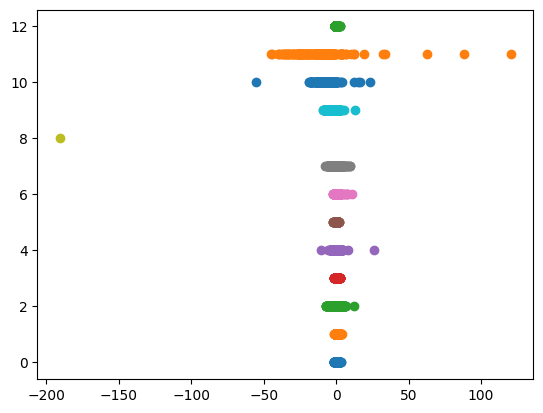

In [33]:
plt.scatter(c1['Amount'], [0] * len(c1['Amount']))
plt.scatter(c2['Amount'], [1] * len(c2['Amount']))
plt.scatter(c3['Amount'], [2] * len(c3['Amount']))
plt.scatter(c4['Amount'], [3] * len(c4['Amount']))
plt.scatter(c5['Amount'], [4] * len(c5['Amount']))
plt.scatter(c6['Amount'], [5] * len(c6['Amount']))
plt.scatter(c7['Amount'], [6] * len(c7['Amount']))
plt.scatter(c8['Amount'], [7] * len(c8['Amount']))
plt.scatter(c9['Amount'], [8] * len(c9['Amount']))
plt.scatter(c10['Amount'], [9] * len(c10['Amount']))
plt.scatter(c11['Amount'], [10] * len(c11['Amount']))
plt.scatter(c12['Amount'], [11] * len(c12['Amount']))
plt.scatter(c13['Amount'], [12] * len(c13['Amount']))